In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (a : trial_type)
#### Load data and check data head
##### Use Control.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataCon = hddm.load_csv('./rt_dataframes/control.csv')
dataCon.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataCon = dataCon.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataCon['rt'] = dataCon['rt']/1000
dataCon.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


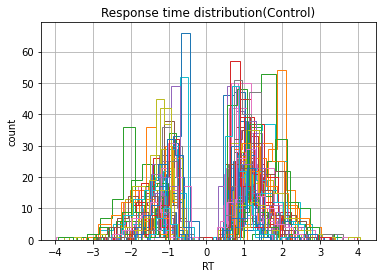

In [4]:
#flip the error RTs to be negative
dataCon = hddm.utils.flip_errors(dataCon)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Control)')
for i, subj_data in dataCon.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/rt_distribution(Con).png')

## Fitting the hierarchical model for one condition with no subject effects for Control participants

In [5]:
m = hddm.HDDM(dataCon,depends_on={'a': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(separate)/traces(2CCon_a)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(separate)/model(2CCon_a)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 990.0 sec

Plotting a(101)
Plotting a(102)
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


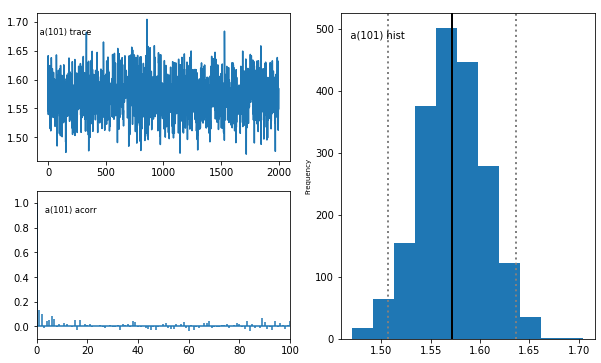

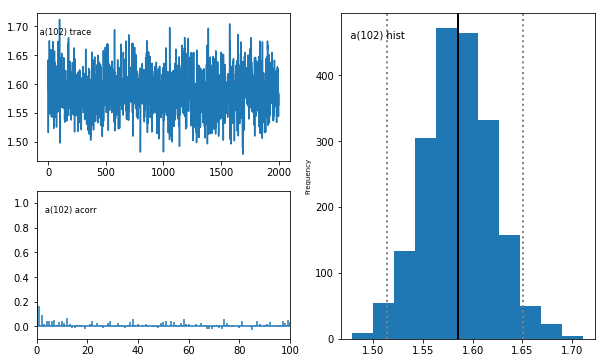

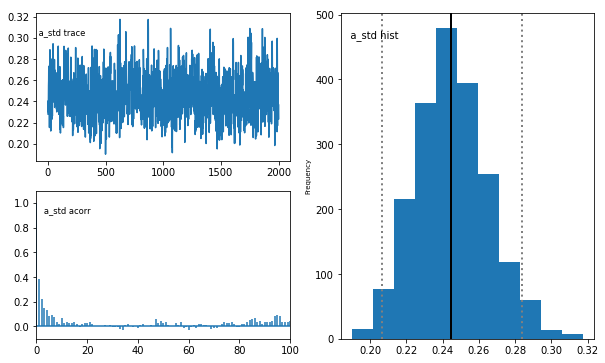

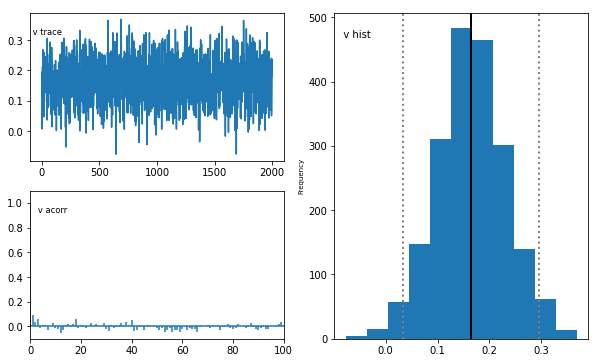

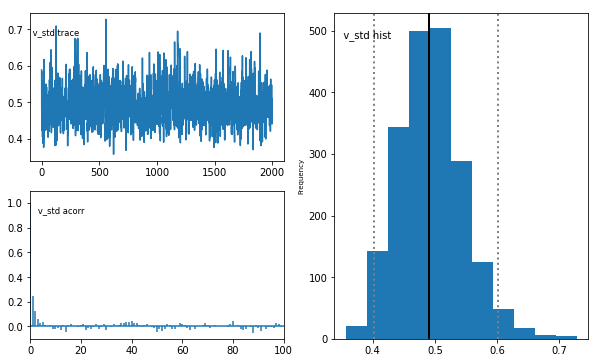

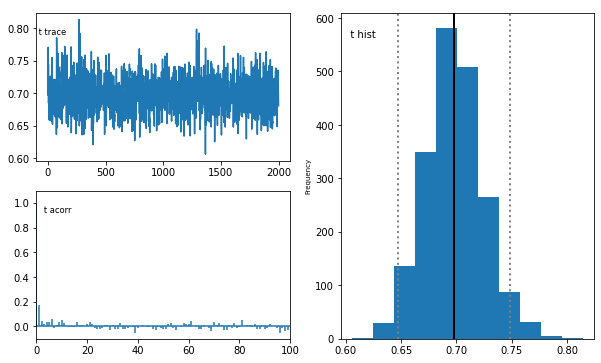

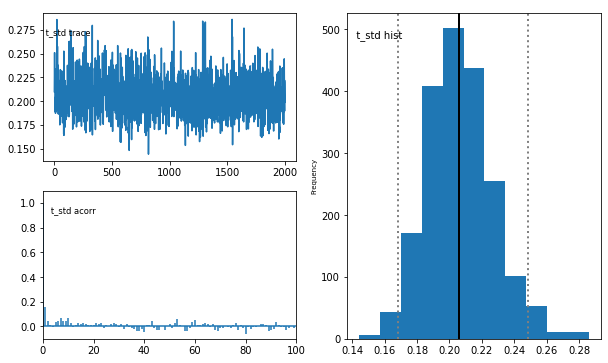

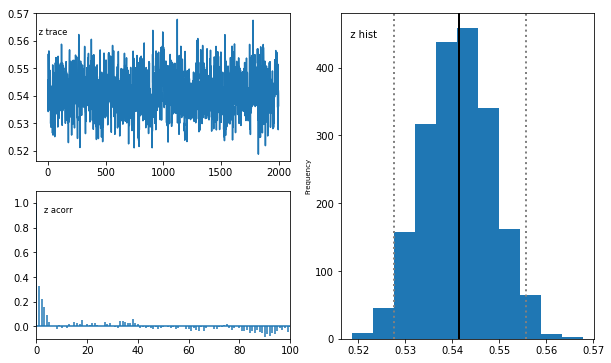

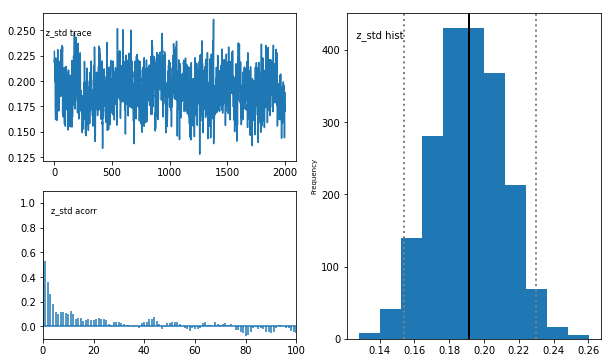

In [6]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [7]:
stats2Ca = m.gen_stats()
stats2Ca.to_csv('./fitting_results/HDDM/HDDM2C(separate)/HDDM2CCon_a.csv', sep=',')
stats2Ca[stats2Ca.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a_std,0.245398,0.0200183,0.208604,0.23171,0.244788,0.258314,0.288307,0.000785153
v,0.164206,0.0665121,0.0350398,0.121538,0.164177,0.20826,0.297056,0.00179562
v_std,0.493612,0.0515357,0.403519,0.457326,0.491112,0.524264,0.603964,0.00161793
t,0.698158,0.0261706,0.648518,0.680736,0.697523,0.715036,0.752215,0.00078336
t_std,0.206535,0.0205535,0.169985,0.192073,0.205835,0.218986,0.251045,0.000620505
z,0.541321,0.00727962,0.527575,0.536314,0.541343,0.546315,0.555659,0.000265135
z_std,0.19112,0.0201007,0.152352,0.177278,0.191263,0.205164,0.228538,0.000942224


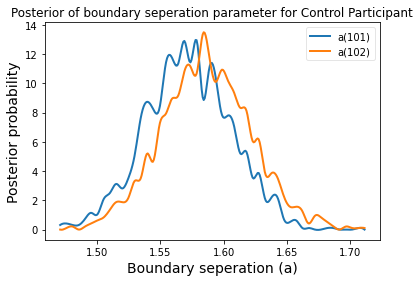

In [8]:
a_101, a_102 = m.nodes_db.node[['a(101)', 'a(102)']]
hddm.analyze.plot_posterior_nodes([a_101, a_102])
plt.xlabel('Boundary seperation (a)', fontsize=14)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of boundary seperation parameter for Control Participant', fontsize=12)
plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/posterior_aCon(101,102).png')

In [9]:
m.dic

16965.4017097298

## Check for model convergence

In [10]:
# Set up models list to append results
models = list()

In [11]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(separate)/chain2Ca_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(separate)/chain2CaCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [12]:
num_chains = 5
data_chains = [(dataCon,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 1Fitting chain 0Fitting chain 2Fitting chain 3Fitting chain 4






/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------97%----------------  ] 2918 of 3000 complete in 571.6 sec                0%                  ] 4 of 3000 complete in 0.6 sec  [                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec [                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 13 of 3000 complete in 2.3 sec[        

In [13]:
models

In [15]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0003642260997854
a_std: 1.001899700739604
a_subj.02535fcf7e16bb56: 1.0055688939506018
a_subj.09ba82a2ca814481: 1.0001602427074932
a_subj.0abfc32a4d12c731: 1.0002215145915063
a_subj.0b0a94c202d0b233: 0.9999595501900593
a_subj.0d894551bc966608: 1.0006689760092358
a_subj.15e0c065b2c11595: 1.0001666007667458
a_subj.163b12703c8e5c3c: 1.0002486100760228
a_subj.1bf86ff948486447: 0.9999858890205435
a_subj.1cb976bac3a2016b: 1.0003511424109521
a_subj.22d84796012679e8: 0.9999860551297782
a_subj.247384e4eccc4f80: 1.0002155315787666
a_subj.27902f23b60a7b76: 1.0009071172499133
a_subj.296a71628065dfa8: 1.1842262865827906
a_subj.371fb6652968f25f: 1.0002605108555307
a_subj.3ddf191ed8c33c57: 0.9999180143636847
a_subj.414f1040212a659b: 0.9998257903017066
a_subj.46fd6e0b3b5c1df3: 0.999933833090962
a_subj.4866612e834a9f5a: 1.0015074337217644
a_subj.4a43f99c56b2a634: 1.0010812403338296
a_subj.4e3de1ed1c0d6103: 1.0010171013752498
a_subj.5497867d4afb5993: 1.0001508486058386
a_subj.582ab220066afebc: 0.999

In [16]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'a_subj.296a71628065dfa8': 1.1842262865827906, 't_subj.296a71628065dfa8': 1.2740156988061289, 'z_subj_trans.296a71628065dfa8': 1.1445261071098303}

Values smaller than the threshold:
{}


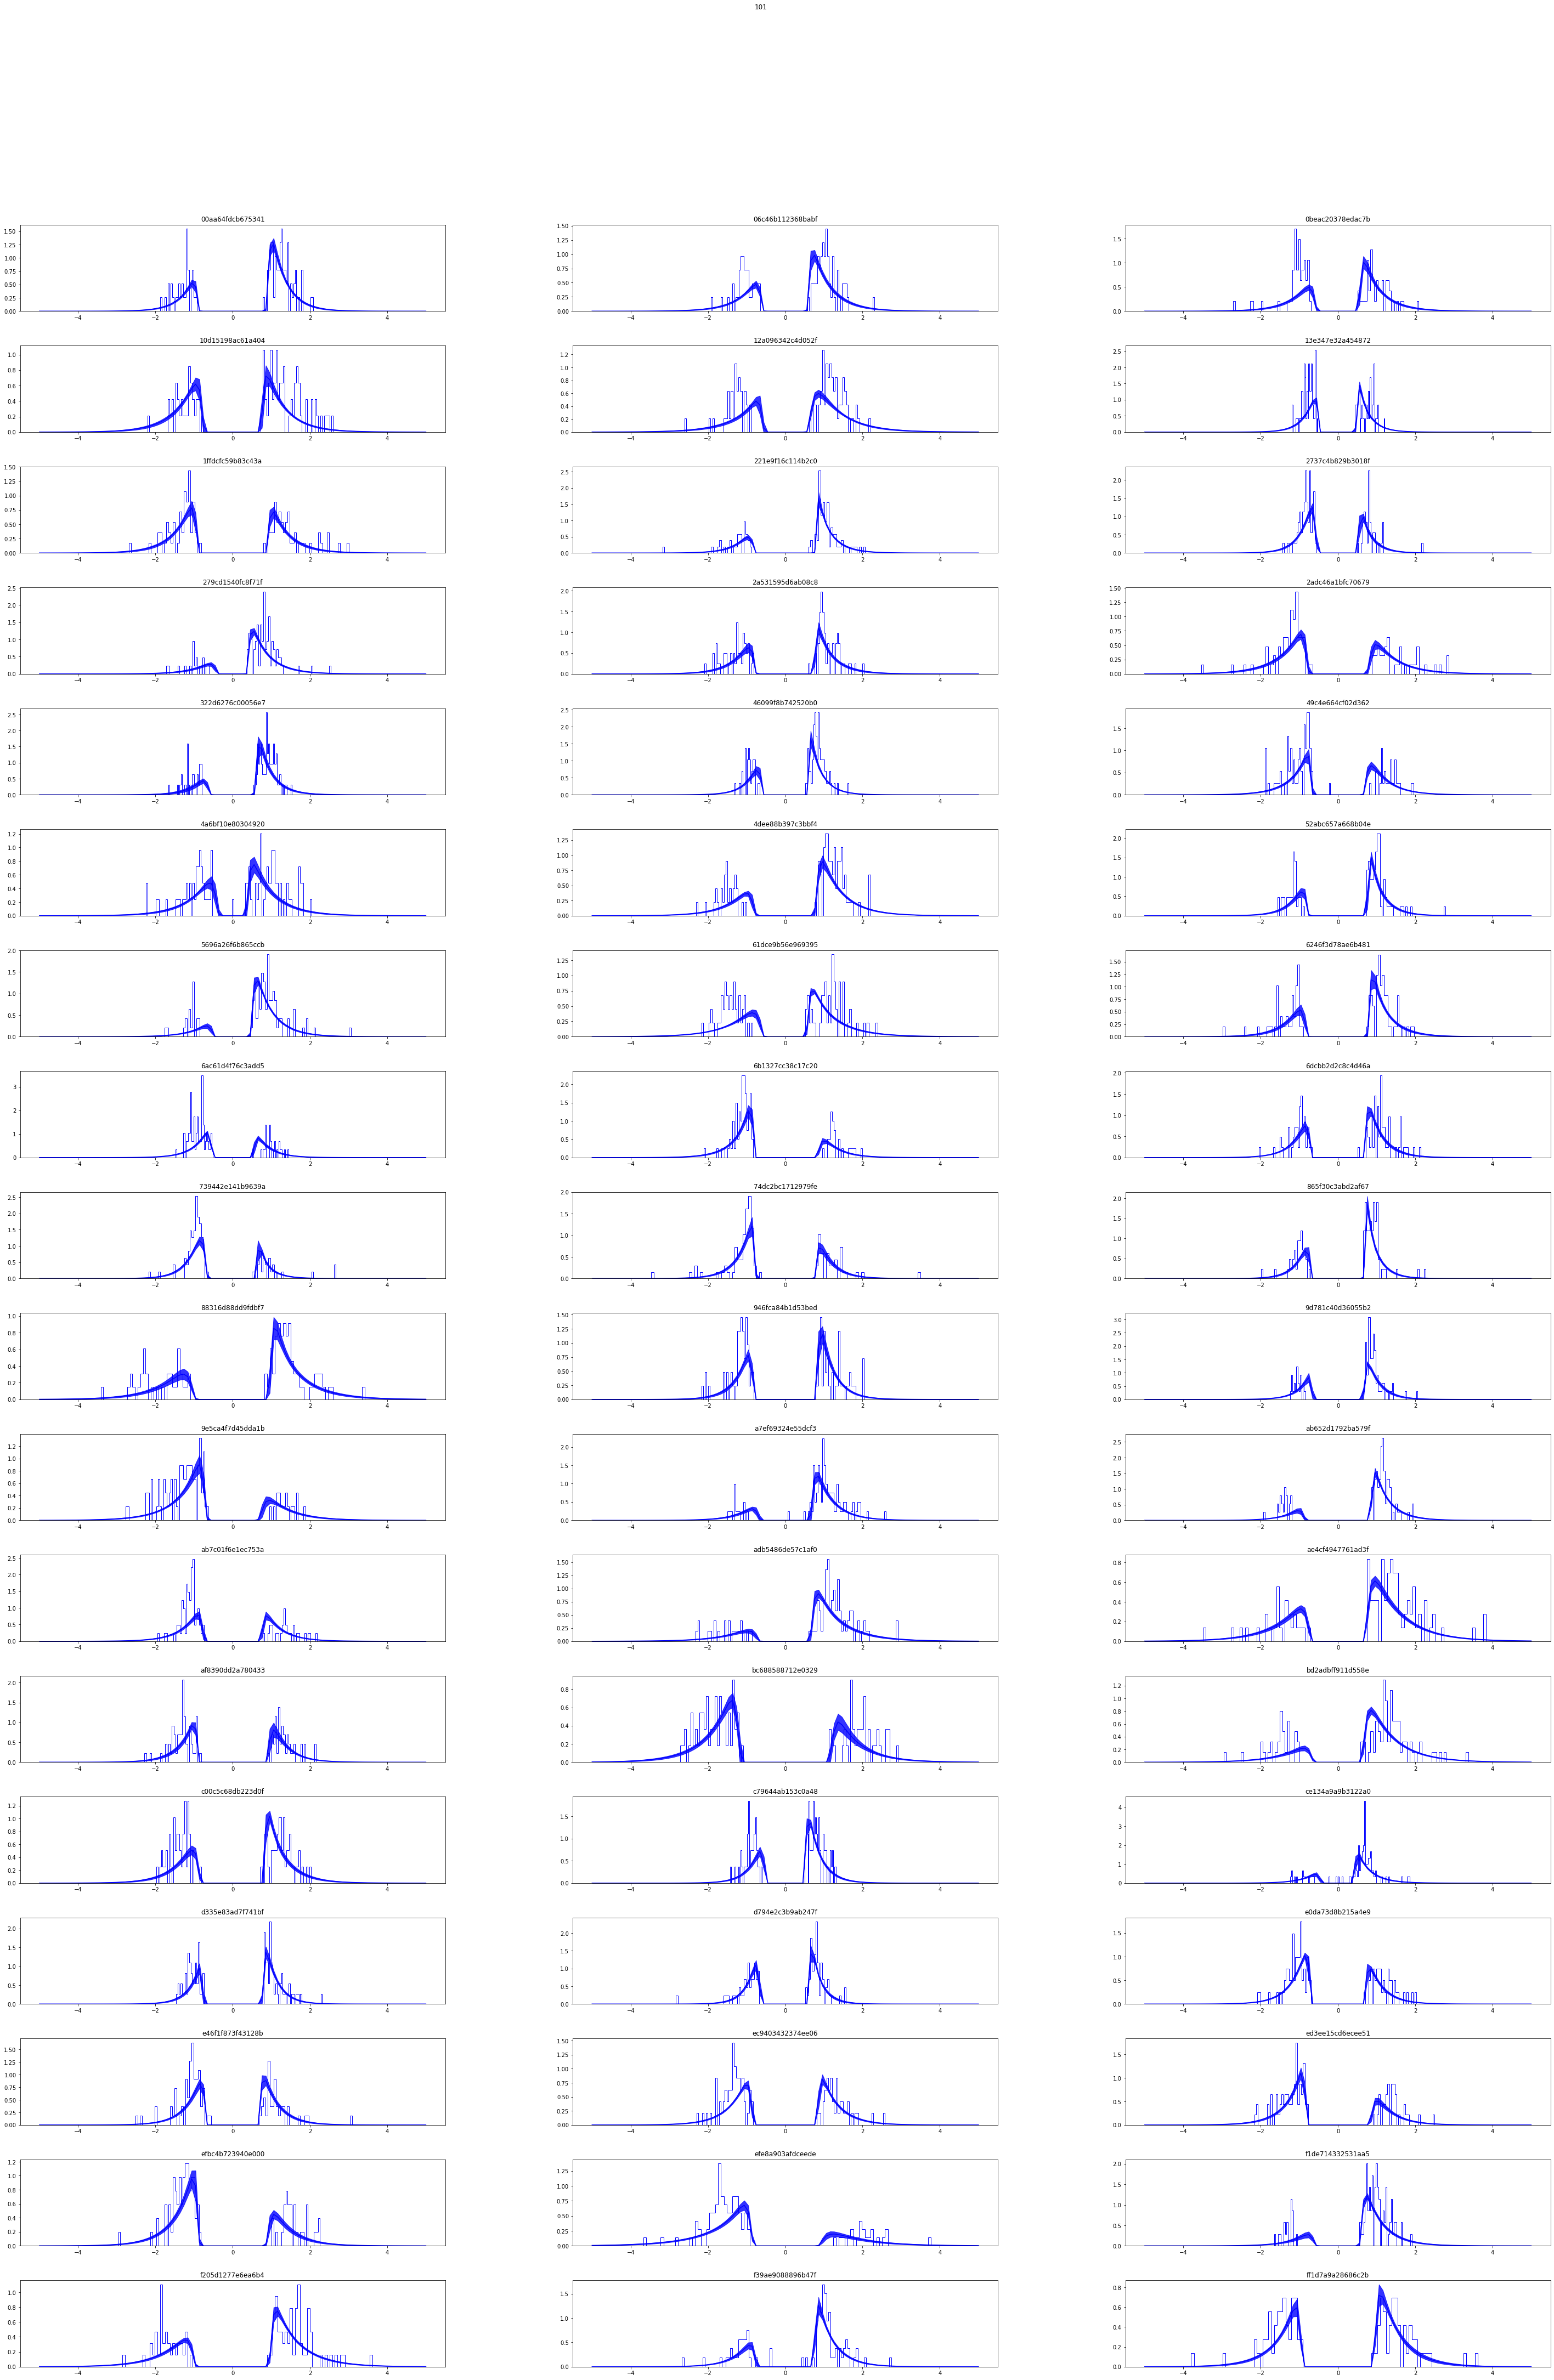

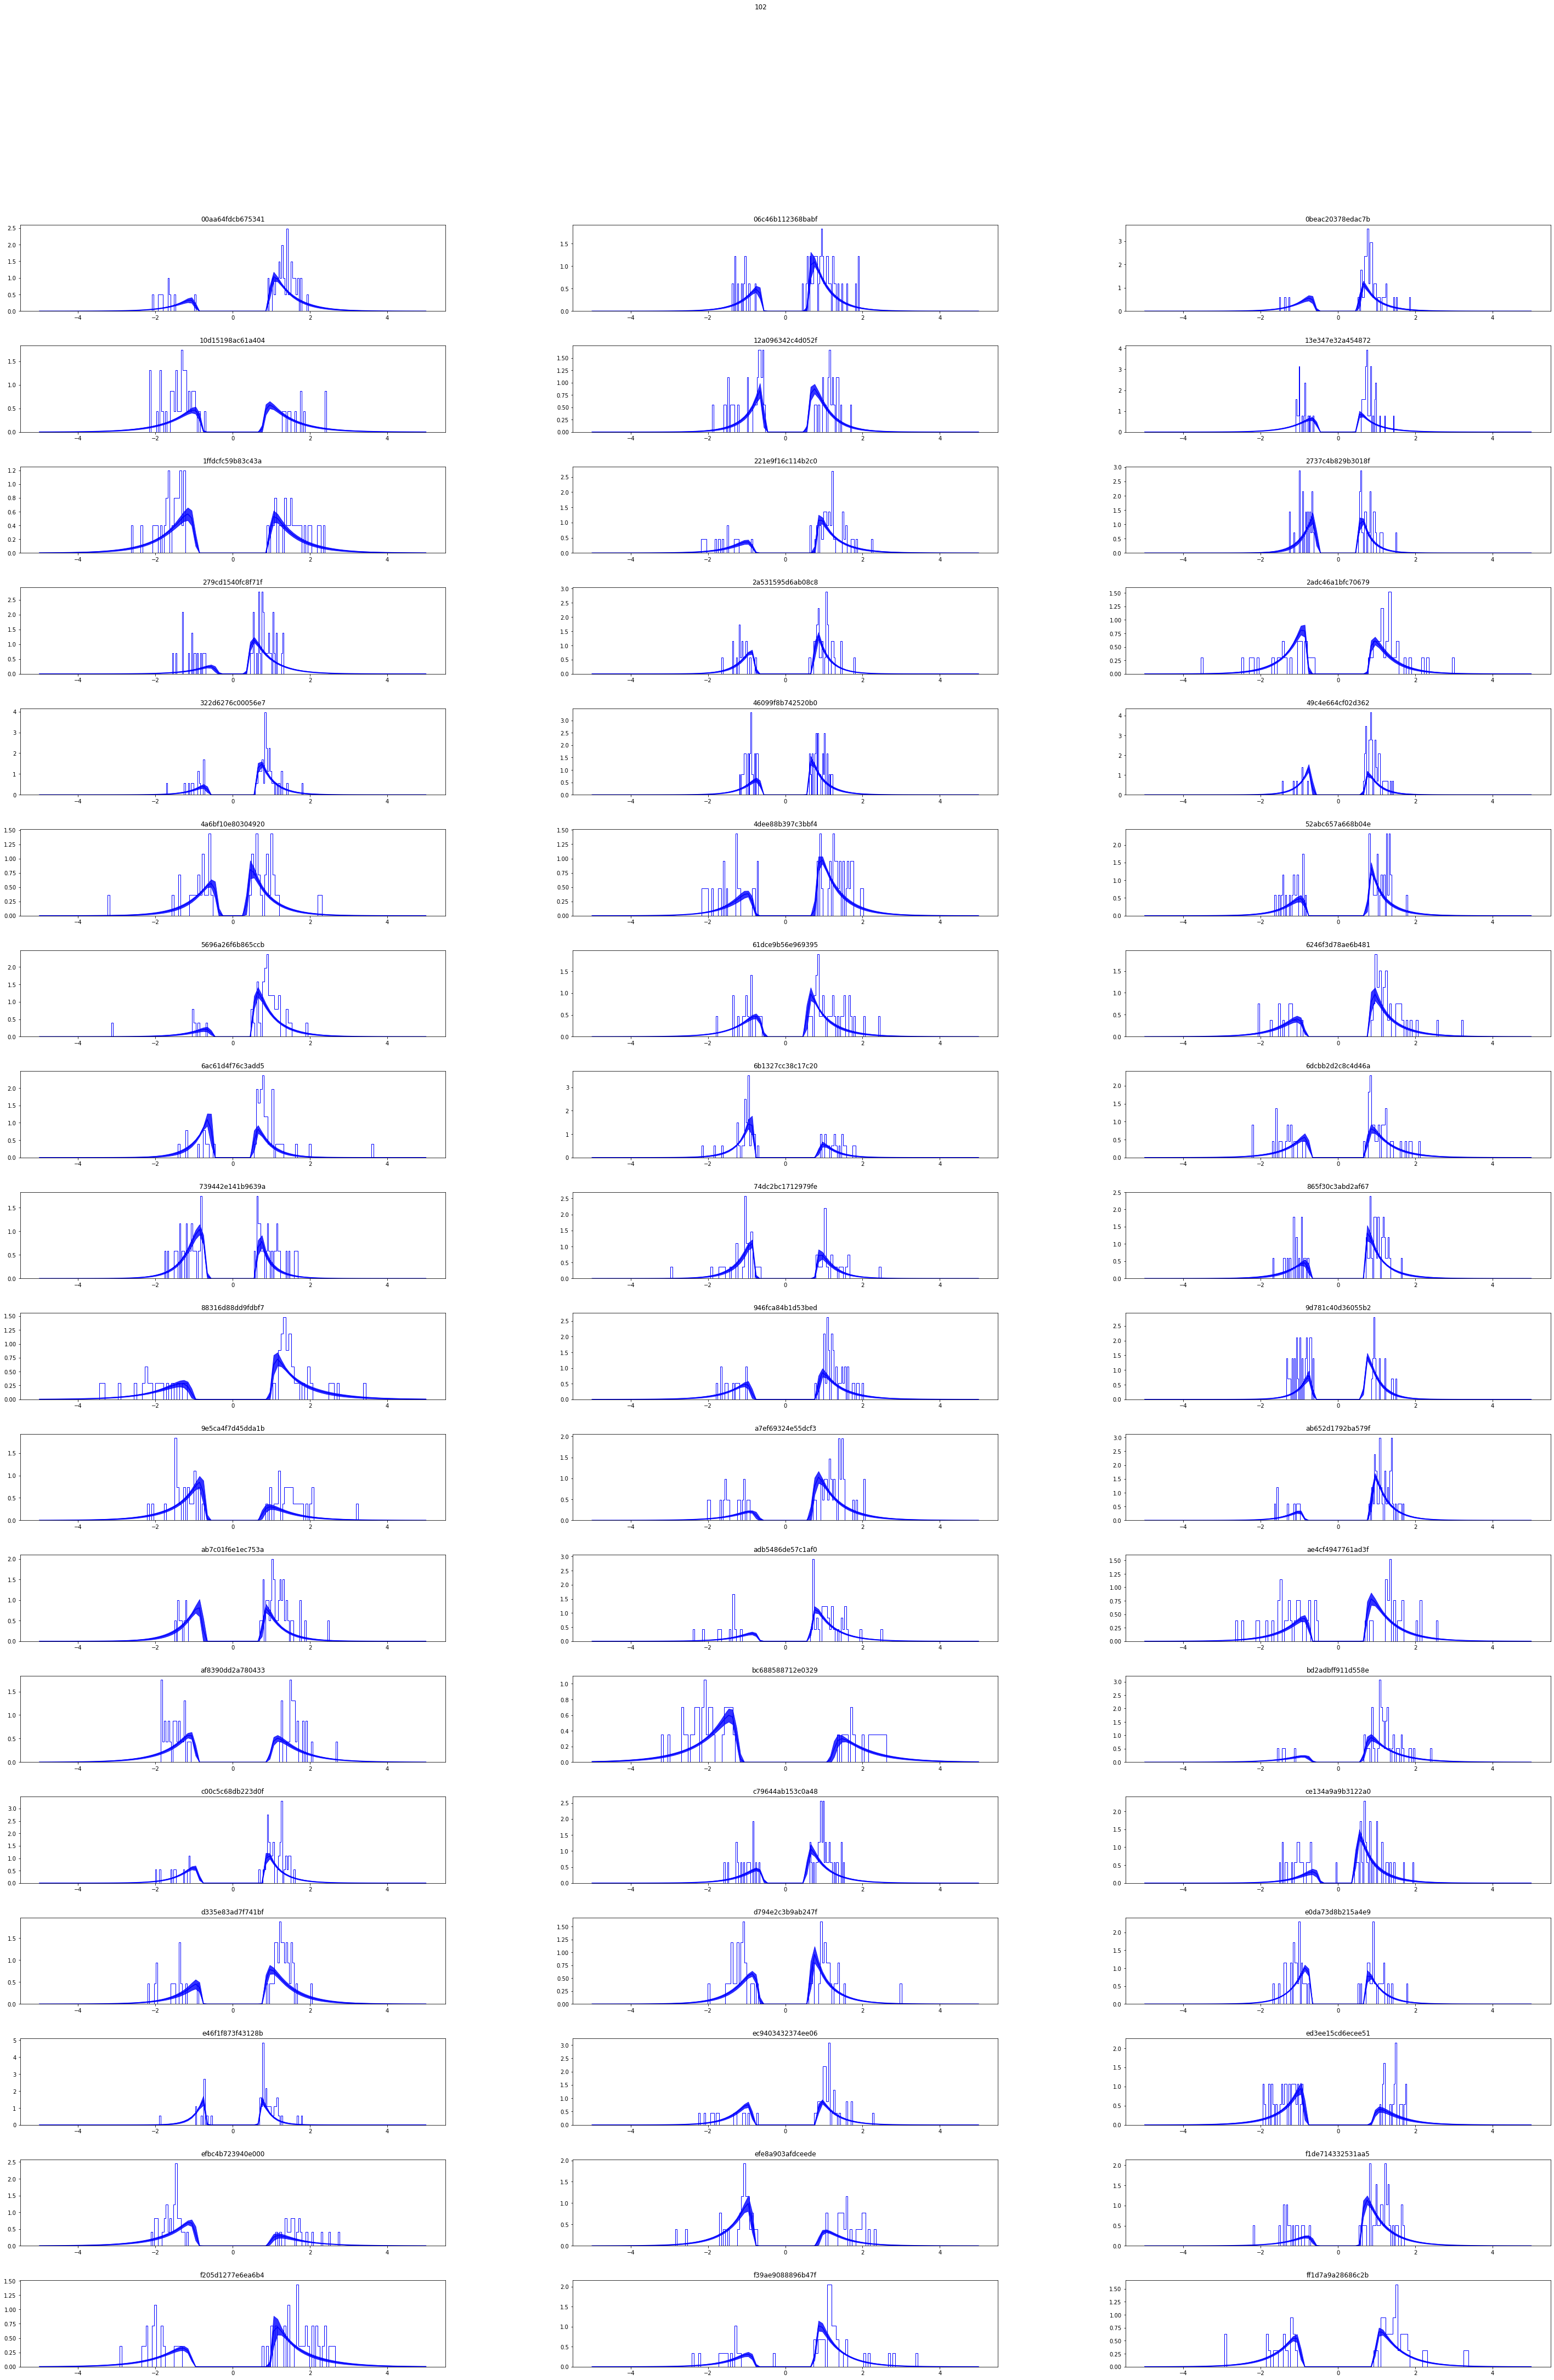

In [23]:
m.plot_posterior_predictive(figsize=(50, 70))